### Select the Right Threshold values using ROC Curve

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

* make_classification will randomly generate classification problems dataset

**Binary Classfication Dataset**

**Create Dataset**

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

**Shape of the dataset**

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

**Train Test Split**

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# **Model Creation**

## **Random Forests**

In [6]:
## Apply RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
ytest_pred = rf_model.predict_proba(X_test)

**ROC-AUC**

In [7]:
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9838222222222223


## **Logistic Regression**

In [8]:
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
ytest_pred = log_classifier.predict_proba(X_test)

**ROC-AUC**

In [9]:
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


Higher the area, better the model

## **Adaboost Classifier**

In [10]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
ytest_pred = ada_classifier.predict_proba(X_test)

**ROC-AUC**

In [11]:
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## **KNNClassifier**

In [12]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
ytest_pred = knn_classifier.predict_proba(X_test)

**ROC-AUC**

In [13]:
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# **Select the best threshold for maximum accuracy**

In [14]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

test roc-auc: 0.9851333333333333


## **Calculate FPR, TPR and Thresholds**

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

## **Calculate Acuuracy, FPR and TPR for each Thresholds**

In [16]:
accuracy_ls = []
TPR_ls = []
FPR_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    TPR = true_positive/(true_positive + false_negative)
    FPR = false_positive/(false_positive + true_negative)
    TPR_ls.append(TPR)
    FPR_ls.append(FPR)
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls), pd.Series(TPR_ls), pd.Series(FPR_ls) ], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy','TPR', 'FPR']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


,thresholds,accuracy,TPR,FPR
31,0.442228,0.961667,0.975945,0.051780
32,0.434603,0.960000,0.975862,0.054839
30,0.449506,0.960000,0.972603,0.051948
29,0.471169,0.960000,0.969388,0.049020
26,0.541059,0.960000,0.960000,0.040000
28,0.472402,0.958333,0.966102,0.049180
27,0.526279,0.958333,0.962963,0.046205
25,0.573004,0.956667,0.950658,0.037162
24,0.573090,0.955000,0.947541,0.037288
33,0.389348,0.948333,0.978648,0.078370


**Plot ROC Curve**

In [17]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

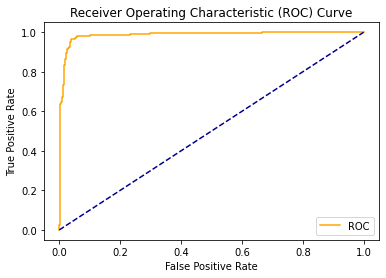

In [18]:
plot_roc_curve(fpr,tpr)

**Observation**
* Higher the AUC, better the model
* Based on the accuracy score, our best results are:

    <table>
    <tr>
    <th>thresholds</th>
    <th>accuracy</th>
    <th>TPR</th>
    <th>FPR</th>
    </tr>
    <tr>
    <td>0.442949</td>
    <td>0.961667</td>
    <td>0.975945</td>
    <td>0.051780</td>
    </tr>
    </table>